# Worksheet 06

Name:  Haya AlMajali
UID: U83334432

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

Essentially, K-means++ is a better version of K-means that picks starting points for clusters in a way that helps the algorithm find better groupings in the data.

b) What are some limitations of K means ++?

 it is computationally expensive, and may not perform well on datasets with non-linear or irregularly shaped clusters, as it assumes clusters to be roughly spherical and of similar size.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

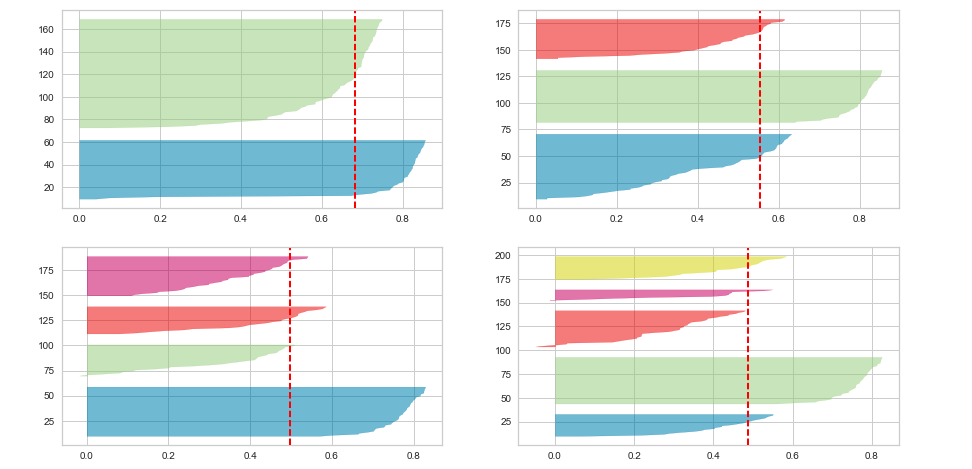

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

I would choose k=2 clusters as the silloute score over the entire dataset is the highest for this parameter.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | $\sqrt{2}$ | 3 | 1 | $2\sqrt{2}$  |
| B | $\sqrt{2}$ | 0 | $\sqrt{5}$ | $\sqrt{2}$ | $\sqrt{2}$  |
| C | 3  |  $\sqrt{5}$ | 0 | $\sqrt{10}$  | 1  |
| D | 1  | $\sqrt{2}$  | $\sqrt{10}$  | 0 | $\sqrt{5}$  |
| E | $2\sqrt{2}$  | $\sqrt{2}$ | 1  | $\sqrt{5}$  | 0 |

Step 2

|   | A | B D  |  C |  E |
|---|---|---|---|---|
| A | 0 | $\sqrt{2}$  | 3  | $2\sqrt{2}$  |
|B D|$\sqrt{2}$   | 0 | $\sqrt{5}$  | $\sqrt{2}$  |
| C |3   |  $\sqrt{5}$ | 0 | 1  |
| E |$2\sqrt{2}$   |$\sqrt{2}$   |1   | 0 |

Step 3

|       | A B D | C | E |
|---    |---    |---|---|
| A B D | 0     |$\sqrt{5}$|$\sqrt{2}$|
|   C   |$\sqrt{5}$| 0 |1|
|   E   |$\sqrt{2}$|1| 0 |

Step 4

|   | A B D E | C |
|---|---|---|
| A B D E  | 0 |1|
|  C |  1 | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |$\sqrt{2}$   |3   |1   |$\sqrt{8}$   |
| B | $\sqrt{2}$  | 0 | $\sqrt{5}$  | $\sqrt{2}$  | $\sqrt{5}$  |
| C |  3 | $\sqrt{5}$  | 0 |$\sqrt{10}$   |$\sqrt{5}$  |
| D | 1  |$\sqrt{2}$   | $\sqrt{10}$  | 0 |$\sqrt{5}$   |
| E | $\sqrt{8}$  | $\sqrt{5}$  | $\sqrt{5}$ |$\sqrt{5}$   | 0 |

Step 2

|   | A  |B D   | C  | E  |
|---|---|---|---|---|
| A  | 0 | $\sqrt{2}$  |3   |$\sqrt{8}$   |
|B D   | $\sqrt{2}$  | 0 | $\sqrt{5}$  |$\sqrt{5}$   |
|C   | 3  | $\sqrt{5}$  | 0 |$\sqrt{5}$   |
| E  |$\sqrt{8}$   |$\sqrt{5}$   | $\sqrt{5}$  | 0 |

Step 3

|   | A B D  |  C | E |
|---|---|---|---|
| A B D  | 0 | 3  | $\sqrt{8}$  |
| C  |  3 | 0 | $\sqrt{5}$  |
| e  | $\sqrt{8}$  |  $\sqrt{5}$ | 0 |

Step 4

|   | A B D E  | C  |
|---|---|---|
| A B D E  | 0 | 3  |
| C  |  3 | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

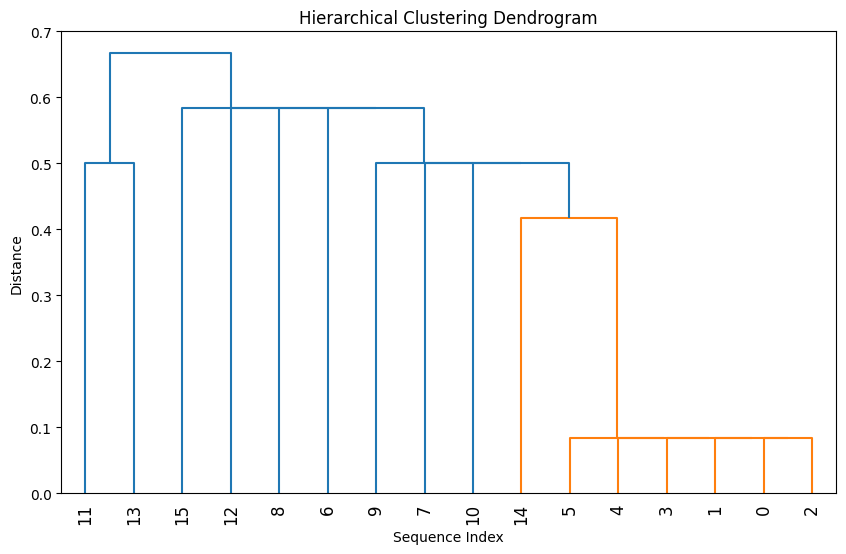

In [4]:
import numpy as np
from scipy.spatial.distance import hamming, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

sequences = [
    'ACGTGGTCTTAA',
    'ACGTCGTCTTAC',
    'ACGTGGTCTTAC',
    'ACGTAGTCTTAA',
    'ACGTGGTCTTCC',
    'ACGTGGTCTTAG',
    'CTGTTAAATAAG',
    'GGTTAGAACACG',
    'AGTGGTTGAAGT',
    'GGCTTACACCCT',
    'AGATTGTCCACT',
    'CATGCGGTCAAC',
    'ATATATCATAGC',
    'TTTGCGGTTGGA',
    'GAATGGTCAGAA',
    'GTGATGCTGTCT'
]

# Compute Hamming Distance
def hamming_distance(seq1, seq2):
    return hamming(list(seq1), list(seq2))

# Hierarchical Clustering
def hierarchical_clustering(sequences):
    num_sequences = len(sequences)
    distances = np.zeros((num_sequences, num_sequences))
    
    # Compute distances
    for i in range(num_sequences):
        for j in range(i + 1, num_sequences):
            distances[i, j] = hamming_distance(sequences[i], sequences[j])
            distances[j, i] = distances[i, j]  
    
    # Apply hierarchical clustering using single-linkage method
    condensed_distances = squareform(distances)  
    linkage_matrix = linkage(condensed_distances, method='single')
    
    return linkage_matrix

# Dendrogram
def plot_dendrogram(linkage_matrix, labels=None):
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sequence Index')
    plt.ylabel('Distance')
    plt.show()

# Perform hierarchical clustering
linkage_matrix = hierarchical_clustering(sequences)

# Plot dendrogram
plot_dendrogram(linkage_matrix, labels=np.arange(len(sequences)))